# Dry Bean Sınıflandırması: Makine Öğrenmesiyle Tür Tanımlama

# Dry Bean Sınıflandırması: Makine Öğrenmesiyle Tür Tanımlama

Bu projede, UCI Machine Learning Repository'den alınan Dry Bean Dataset kullanılarak çeşitli kuru baklagil türlerinin sınıflandırılması hedeflenmektedir. Proje kapsamında veri ön işleme, aykırı değer tespiti, öznitelik çıkarımı (PCA, LDA), modelleme (Logistic Regression, Decision Tree, Random Forest, XGBoost, Naive Bayes) ve nested cross-validation ile değerlendirme adımları gerçekleştirilecektir. ROC eğrileri çizilerek modellerin sınıflar arası ayırt etme başarımı görsel olarak sunulacaktır.

## Dry Bean Dataset – İçerik Özeti:

16 öznitelik ("Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRatio", "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity", "Roundness", "Compactness", "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4")

7 sınıf (Seker, Barbunya, Bombay, Cali, Horoz, Sira, Dermason)

Toplam 13.611 örnek

Dataset linki: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

In [5]:
import pandas as pd

data = {
    "Özellikler": [
        "Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRatio",
        "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity",
        "Roundness", "Compactness", "ShapeFactor1", "ShapeFactor2",
        "ShapeFactor3", "ShapeFactor4", "Class"
    ],
    "Türü": [
        "Tam sayı", "Sürekli", "Sürekli", "Sürekli", "Sürekli",
        "Sürekli", "Tam sayı", "Sürekli", "Sürekli", "Sürekli",
        "Sürekli", "Sürekli", "Sürekli", "Sürekli",
        "Sürekli", "Sürekli", "Kategorik"
    ],
    "Açıklama": [
        "Bir fasulye bölgesinin alanı ve sınırları içindeki piksel sayısı",
        "Fasulyenin çevresi, kenar uzunluğu olarak tanımlanır",
        "Bir fasulyeden çizilebilecek en uzun çizgi arasındaki mesafe",
        "Ana eksene dik şekilde durarak fasulyeden çizilebilecek en uzun çizgi",
        "MajorAxisLength ve MinorAxisLength arasındaki ilişkiyi tanımlar",
        "Aynı momentlere sahip elipsin dışmerkezliği",
        "Fasulye tohumunu içerebilecek en küçük dışbükey çokgenin piksel sayısı",
        "Aynı alana sahip bir dairenin çapı olarak tanımlanan eşdeğer çap",
        "Fasulye alanının çevreleyen kutudaki piksellere oranı",
        "Fasulyelerde bulunan dışbükey kabuklara benzer piksellerin oranı",
        "(4piA)/(P^2) formülü ile hesaplanan yuvarlaklık değeri",
        "Bir nesnenin yuvarlaklığını ölçer",
        "Şekil faktörüne dayalı özellik",
        "Şekil faktörüne dayalı özellik",
        "Şekil faktörüne dayalı özellik",
        "Şekil faktörüne dayalı özellik",
        "(Seker, Barbunya, Bombay, Cali, Dermason, Horoz, Sira)"
    ],
    "Eksik Değer": ["yok"] * 17
}

df_info = pd.DataFrame(data)
df_info


,Özellikler,Türü,Açıklama,Eksik Değer
0,Area,Tam sayı,Bir fasulye bölgesinin alanı ve sınırları için...,yok
1,Perimeter,Sürekli,"Fasulyenin çevresi, kenar uzunluğu olarak tanı...",yok
2,MajorAxisLength,Sürekli,Bir fasulyeden çizilebilecek en uzun çizgi ara...,yok
3,MinorAxisLength,Sürekli,Ana eksene dik şekilde durarak fasulyeden çizi...,yok
4,AspectRatio,Sürekli,MajorAxisLength ve MinorAxisLength arasındaki ...,yok
5,Eccentricity,Sürekli,Aynı momentlere sahip elipsin dışmerkezliği,yok
6,ConvexArea,Tam sayı,Fasulye tohumunu içerebilecek en küçük dışbüke...,yok
7,EquivDiameter,Sürekli,Aynı alana sahip bir dairenin çapı olarak tanı...,yok
8,Extent,Sürekli,Fasulye alanının çevreleyen kutudaki pikseller...,yok
9,Solidity,Sürekli,Fasulyelerde bulunan dışbükey kabuklara benzer...,yok


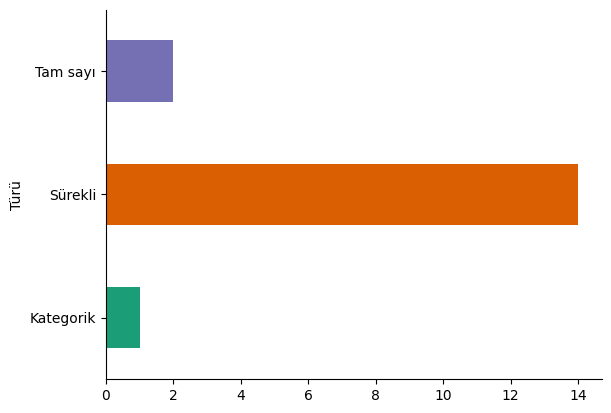

In [4]:
# @title Türü

from matplotlib import pyplot as plt
import seaborn as sns
df_info.groupby('Türü').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [96]:
# Temel Veri İşleme
import pandas as pd
import numpy as np

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Ön İşleme
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Boyut İndirgeme
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Modelleme
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Model Değerlendirme
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, make_scorer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Uyarılar
import warnings
warnings.filterwarnings("ignore")


In [43]:
# Google Colab'a dosya yüklemek için
from google.colab import files
uploaded = files.upload()

Saving Dry_Bean_Dataset.xlsx to Dry_Bean_Dataset (1).xlsx


In [3]:
# Excel dosyasını oku
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [44]:
print("Veri setinin boyutu:", df.shape)
df.head()

Veri setinin boyutu: (13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [45]:
dry_bean = df.copy()

In [46]:
# %5 eksik veri eklenecek sütunlar
for col in ['Area', 'Perimeter']:
    dry_bean.loc[dry_bean.sample(frac=0.05, random_state=42).index, col] = np.nan

# %35 eksik veri eklenecek sütun
dry_bean.loc[df.sample(frac=0.35, random_state=1).index, 'Compactness'] = np.nan

# Eksik verileri gözlemle
dry_bean.isnull().sum()

,0
Area,681
Perimeter,681
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [48]:
# %5 eksikleri ortalama ile doldur
for col in ['Area', 'Perimeter']:
    dry_bean[col] = dry_bean[col].fillna(dry_bean[col].mean())

# %35 eksik içeren 'Compactness' sütununu SATIR bazlı sil
dry_bean = dry_bean[dry_bean['Compactness'].notna()]

# Eksik veri kaldı mı kontrol et
print("Eksik veri sonrası durum:")
print(dry_bean.isnull().sum())

Eksik veri sonrası durum:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


Dry Bean veri setine, ödev yönergesi doğrultusunda `Area` ve `Perimeter` sütunlarına %5 oranında, `Compactness` sütununa ise %35 oranında eksik veri eklenmiştir. %5 eksik içeren sütunlar, her sütunun ortalaması ile doldurulmuş; %35 oranında eksik içeren `Compactness` sütunu ise satır bazlı silinerek veri setinden temizlenmiştir. Bu işlemler sonrası eksik veri kalmamıştır.


## Aykırı Değer Tespiti

| Yöntem   | Açıklama                                                                 | Kullanım Durumu                                     |
|----------|--------------------------------------------------------------------------|-----------------------------------------------------|
| **IQR (Interquartile Range)** | Q1 ve Q3 arasındaki aralığı baz alır. Aykırılar bu aralığın 1.5 katı dışındakilerdir. | Veri dağılımı **asimetrik** veya medyan merkezliyse önerilir |
| **Z-score** | Değerlerin standart sapmadan sapma miktarına bakar. | Veri **normal dağılıma yakın** ise önerilir         |


Dry Bean verisi biyolojik ve şekil temelli olduğu için genelde asimetrik dağılır. Bu yüzden IQR yöntemi daha uygun olur.

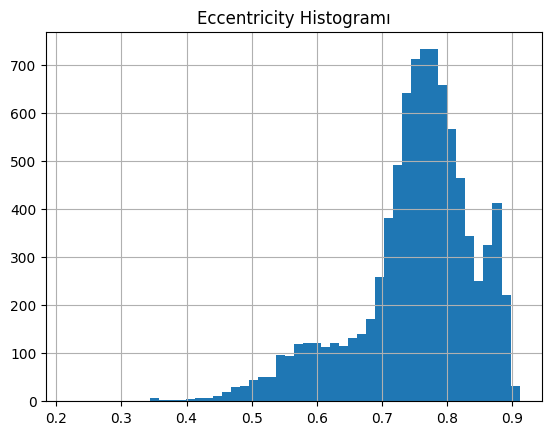

In [49]:
dry_bean['Eccentricity'].hist(bins=50)
plt.title("Eccentricity Histogramı")
plt.show()

#### Histogram Yorum ve Yöntem Seçimi: `Eccentricity`

Aykırı değer tespiti yöntemi seçilirken, kullanılacak yöntemin veri dağılımına uygun olup olmadığını değerlendirmek kritik bir adımdır. Bu doğrultuda, veri setindeki tüm sayısal değişkenler arasından `Eccentricity` değişkeni, histogram analizi için örnek olarak seçilmiştir. Bunun iki temel nedeni vardır:

1. `Eccentricity` dağılımı, öznitelikler arasında en belirgin çarpıklık gösteren değişkenlerden biridir.  
   Bu durum, aykırı değer tespiti yönteminin seçiminde belirleyici olabilecek simetriden uzak bir yapıyı temsil eder.

2. Bu değişkenin grafiksel analizi, asimetrik dağılıma sahip bir örnek üzerinden hangi yöntemin (Z-score vs IQR) daha uygun olduğunu göstermek adına öğretici ve temsil edici bir örnek sunar.

Dolayısıyla, aykırı değer yönteminin seçimini somut bir dağılım yapısı üzerinde temellendirmek amacıyla `Eccentricity` değişkeni kullanılmıştır.

`Eccentricity` değişkenine ait histogram incelendiğinde, veri dağılımının simetrik olmadığı ve sağa çarpık (pozitif çarpıklık) bir yapı sergilediği gözlemlenmiştir. Özellikle 0.7 civarında yoğunlaşan örnekler ile yüksek değerli uçlar arasında dengesizlik bulunmaktadır. Bu durum, düşük değerlere sahip örneklerin sayısının görece az, yüksek değerlere sahip örneklerin ise daha fazla olduğunu göstermektedir.

Veri dağılımının çan eğrisi şeklinde olmaması ve pozitif yönde asimetri göstermesi, bu değişkenin normal dağılmadığını ortaya koymaktadır. Bu nedenle, standart sapmaya dayanan Z-score yöntemi yerine, dağılımın merkezi eğilimlerini dikkate alan çeyreklikler arası aralık (IQR) yöntemi aykırı değer tespiti için daha güvenilir bulunmuştur.

Sonuç olarak, `Eccentricity` değişkeni özelinde ve genelde dağılımın simetrik olmaması nedeniyle, IQR yöntemi tercih edilmiş ve uygulanmıştır.


In [50]:
# Sayısal sütunları seç
numeric_cols = dry_bean.select_dtypes(include=['float64', 'int64']).columns

# Her sütunun çarpıklığını hesapla
skew_values = dry_bean[numeric_cols].skew().sort_values(ascending=False)

# DataFrame olarak göster
skew_values_df = pd.DataFrame(skew_values, columns=["Skewness"])
skew_values_df

,Skewness
Area,3.007266
ConvexArea,2.916333
MinorAxisLength,2.209790
EquivDiameter,1.930511
Perimeter,1.657707
MajorAxisLength,1.349758
AspectRation,0.582614
ShapeFactor2,0.299554
ShapeFactor3,0.237153
Compactness,0.032943


#### Skewness Değeri ve Yöntem Seçimi:

| Skewness Değeri      | Dağılım Yorumu        | Aykırı Tespit Yöntemi     |
|----------------------|------------------------|----------------------------|
| ≈ 0                  | Simetrik               | Z-score olabilir           |
| ±0.5'ten büyük       | Orta düzey asimetrik   | IQR önerilir               |
| ±1'den büyük         | Kuvvetli asimetrik     | Kesinlikle IQR kullanılmalı |



Veri setindeki tüm sayısal değişkenler için çarpıklık (skewness) değerleri hesaplanmış ve bu değerlere göre dağılımların simetrik olup olmadığı incelenmiştir. Normal dağılımda skewness değeri 0'a yakın olurken, ±1'in üzerindeki değerler güçlü asimetrik dağılımı işaret eder.

Skewness değerleri incelendiğinde `Area` (3.00), `ConvexArea` (2.91), `MinorAxisLength` (2.20), `EquivDiameter` (1.93) ve `Perimeter` (1.66) gibi birçok değişkende yüksek pozitif çarpıklık gözlenmiştir. Aynı şekilde `Eccentricity` (-1.04), `Solidity` (-2.53) ve `ShapeFactor4` (-2.59) gibi değişkenlerde de yüksek negatif çarpıklık söz konusudur.

Bu durum, veri setinin önemli bir kısmında **asimetrik dağılımlar** bulunduğunu ortaya koymaktadır. Dolayısıyla, aykırı değer tespiti için standart sapma temelli Z-score yöntemi yerine, daha dayanıklı ve asimetrik yapıya uygun olan IQR (Interquartile Range) yöntemi tercih edilmiştir.

IQR yöntemi, merkezi yayılımı temel alarak çan eğrisi varsayımı gerektirmediği için, bu veri setinde daha güvenilir ve uygun bir seçimdir.

In [51]:
# Sayısal sütunları seç
numeric_cols = dry_bean.select_dtypes(include=['float64', 'int64']).columns

# Aykırı değerleri tespit et
outlier_counts = {}

for col in numeric_cols:
    Q1 = dry_bean[col].quantile(0.25)
    Q3 = dry_bean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dry_bean[(dry_bean[col] < lower_bound) | (dry_bean[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Sonuçları DataFrame olarak göster
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Aykırı Değer Sayısı'])
outlier_df.sort_values('Aykırı Değer Sayısı', ascending=False)

,Aykırı Değer Sayısı
Eccentricity,548
Solidity,509
ShapeFactor4,491
MinorAxisLength,369
Area,363
ConvexArea,357
ShapeFactor1,343
EquivDiameter,342
Perimeter,318
AspectRation,308


### Aykırı Değerlerle Baş Etme Yöntemleri ve Uygulama Kararı

IQR (Interquartile Range) yöntemi kullanılarak veri setindeki tüm sayısal sütunlarda aykırı değer tespiti yapılmıştır. Her sütun için Q1 ve Q3 değerleri üzerinden IQR hesaplanmış, ardından 1.5 * IQR dışına çıkan gözlemler aykırı olarak değerlendirilmiştir.

Analiz sonucunda en çok aykırı değere sahip değişkenlerin sırasıyla `Eccentricity` (548), `Solidity` (509) ve `ShapeFactor4` (491) olduğu görülmektedir. Bu değişkenler aynı zamanda daha önce yapılan skewness analizinde de güçlü asimetrik dağılım gösteren öznitelikler arasında yer almaktadır. Bu bulgu, dağılımın çarpıklığı ile aykırı değer sıklığı arasında doğrudan bir ilişki olduğunu desteklemektedir.

Buna karşın `ShapeFactor2` değişkeninde hiçbir aykırı değer bulunmamıştır. Bu durum, bu öznitelikteki dağılımın hem merkezi eğilim hem de yayılım açısından daha dengeli olduğunu göstermektedir.

Aykırı değer sayısının çok yüksek olduğu değişkenlerde doğrudan silme işlemi, veri kaybına yol açabileceğinden; bu değerler alt ve üst sınırlarla sınırlanarak (clip) etkileri azaltılma yöntemi uygulanacaktır. Böylece veri bütünlüğü korunmuş ve uç değerlerin model performansını bozması önlenecektir.


In [53]:
# Clip öncesi istatistik
dry_bean[numeric_cols].describe().T[["min", "max"]]

,min,max
Area,20420.000000,254616.000000
Perimeter,524.736000,1985.370000
MajorAxisLength,183.601165,738.860153
MinorAxisLength,122.512653,460.198497
AspectRation,1.024868,2.430306
Eccentricity,0.218951,0.911423
ConvexArea,20684.000000,263261.000000
EquivDiameter,161.243764,569.374358
Extent,0.555315,0.858420
Solidity,0.919246,0.994082


In [54]:
# Uygulamadan önce describe al
before_clip = dry_bean[numeric_cols].describe()

# Aykırı değerleri clip et
for col in numeric_cols:
    Q1 = dry_bean[col].quantile(0.25)
    Q3 = dry_bean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    dry_bean[col] = dry_bean[col].clip(lower, upper)

# Uygulamadan sonra describe al
after_clip = dry_bean[numeric_cols].describe()

# Karşılaştırma tablosu oluştur
comparison = pd.DataFrame({
    "Min Önce": before_clip.loc["min"],
    "Min Sonra": after_clip.loc["min"],
    "Max Önce": before_clip.loc["max"],
    "Max Sonra": after_clip.loc["max"]
})
comparison

,Min Önce,Min Sonra,Max Önce,Max Sonra
Area,20420.000000,20420.000000,254616.000000,95080.500000
Perimeter,524.736000,524.736000,1985.370000,1356.379500
MajorAxisLength,183.601165,183.601165,738.860153,560.941037
MinorAxisLength,122.512653,122.512653,460.198497,279.580000
AspectRation,1.024868,1.024868,2.430306,2.118080
Eccentricity,0.218951,0.575095,0.911423,0.911423
ConvexArea,20684.000000,20684.000000,263261.000000,100924.750000
EquivDiameter,161.243764,161.243764,569.374358,376.551935
Extent,0.555315,0.614460,0.858420,0.858420
Solidity,0.919246,0.979139,0.994082,0.994082


Veri setinde tespit edilen aykırı değerlerin etkisini azaltmak amacıyla, IQR yöntemine dayalı alt ve üst sınır hesaplamaları yapılmış ve bu sınırlar dışındaki aykırı değerler, ilgili sınır değerlerine eşitlenmiştir (clip uygulanmıştır).

Clip işlemi öncesi ve sonrası yapılan tanımlayıcı istatistik (describe) karşılaştırmasına göre:

- `Area` sütununda maksimum değer, 254616'dan 95080.5'e düşürülerek önemli bir uç değer etkisizleştirilmiştir.
- `Eccentricity` değişkeninde minimum değer 0.218'den 0.575'e çekilmiştir; bu, uç değerin alt sınırla sınırlandırıldığını göstermektedir.
- Benzer şekilde `Perimeter`, `EquivDiameter`, `ConvexArea`, `ShapeFactor4` gibi değişkenlerde de maksimum değerlerde dikkat çekici bir azalma gözlenmiştir.
- Minimum değerlerde ise bazı sütunlarda gözle görülür değişiklikler sınırlı kalmıştır, bu da çoğu aykırı değerin üst uçta yoğunlaştığını göstermektedir.

Clip işlemi, veri setinden satır veya sütun silmeden, aykırı değerlerin etkisini azaltmış ve dağılımların aşırı uçlardan arındırılmasına katkı sağlamıştır. Bu sayede hem veri bütünlüğü korunmuş hem de modelleme aşamasında algoritmaların aykırı değerlerden etkilenme riski azaltılmıştır.

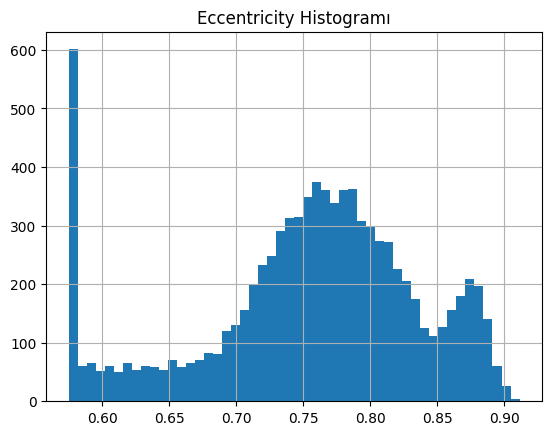

In [55]:
dry_bean['Eccentricity'].hist(bins=50)
plt.title("Eccentricity Histogramı")
plt.show()

Clip uygulaması sonrası `Eccentricity` değişkenine ait histogram incelendiğinde, dağılımın alt sınır değerinde (yaklaşık 0.575) belirgin bir yığılma oluştuğu gözlemlenmektedir. Bu durum, alt sınırın altında kalan tüm aykırı değerlerin bu eşik değere eşitlenmesinden kaynaklanır.

Grafikteki bu dikey yoğunluk çizgisi, clip yönteminin karakteristik bir sonucudur ve uç değerlerin etkisini bastırma amacıyla uygulanmıştır. Dağılımın geri kalanı daha dengeli görünmekle birlikte, clip uygulamasının etkisiyle veri artık bu sınırda yoğunlaşan bir kümeye sahiptir.

Bu uygulama sayesinde uç değerlerin model üzerindeki etkisi azaltılırken, veri kaybı da yaşanmamıştır. Ancak bu tür bir düzeltmenin, dağılımın doğal şeklini bozabileceği ve modelleme sürecinde dikkatle değerlendirilmesi gerektiği unutulmamalıdır.


### Özellik Ölçekleme (Feature Scaling)

Veri setinde yer alan sayısal özniteliklerin farklı büyüklükteki değer aralıklarında bulunması, makine öğrenmesi algoritmalarının performansını olumsuz etkileyebilecek bir durumdur. Özellikle `Area`, `Perimeter` gibi değişkenler çok büyük değerlere sahipken, `ShapeFactor` gibi bazı değişkenler oldukça küçük değer aralıklarında yer almaktadır. Bu durum, modelin yüksek değere sahip öznitelikleri daha "önemli" olarak algılamasına neden olabilir.

Bu nedenle, tüm sayısal veriler **ortalaması 0, standart sapması 1 olacak şekilde** dönüştürülerek aynı ölçek düzeyine getirilmiştir. Bu işlem için `StandardScaler` yöntemi kullanılmıştır.

`StandardScaler` yöntemi özellikle:
- Mesafeye dayalı algoritmalar için veri standardizasyonu sağlar,
- PCA ve LDA gibi boyut indirgeme tekniklerinde öznitelikler arası baskıyı azaltır,
- Veri içindeki değişkenliği daha dengeli hâle getirir.

Ek olarak, veri setindeki aykırı değerler clip yöntemiyle bastırıldığı için, `StandardScaler` uygulaması bu uç değerlerin etkisini artırmamış, aksine modelin daha dengeli öğrenmesine zemin hazırlamıştır. Tüm bu nedenlerle, bu proje kapsamında `StandardScaler` en uygun yöntem olarak tercih edilmiştir.


In [74]:
# Ölçekleme öncesi kopya al
before_scaling = dry_bean.copy()

In [75]:
# Sadece sayısal sütunları ölçekleyelim
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dry_bean[numeric_cols])

# Yeni ölçeklenmiş dataframe oluştur
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# İsteğe bağlı: orijinal kategorik sütunları ekle
scaled_df["Class"] = dry_bean["Class"].values

In [76]:
# Tüm preprocessing sonrası PCA ve LDA kullanım amaçlı
scaled_features_df = scaled_df.copy()

<Figure size 1600x1000 with 0 Axes>

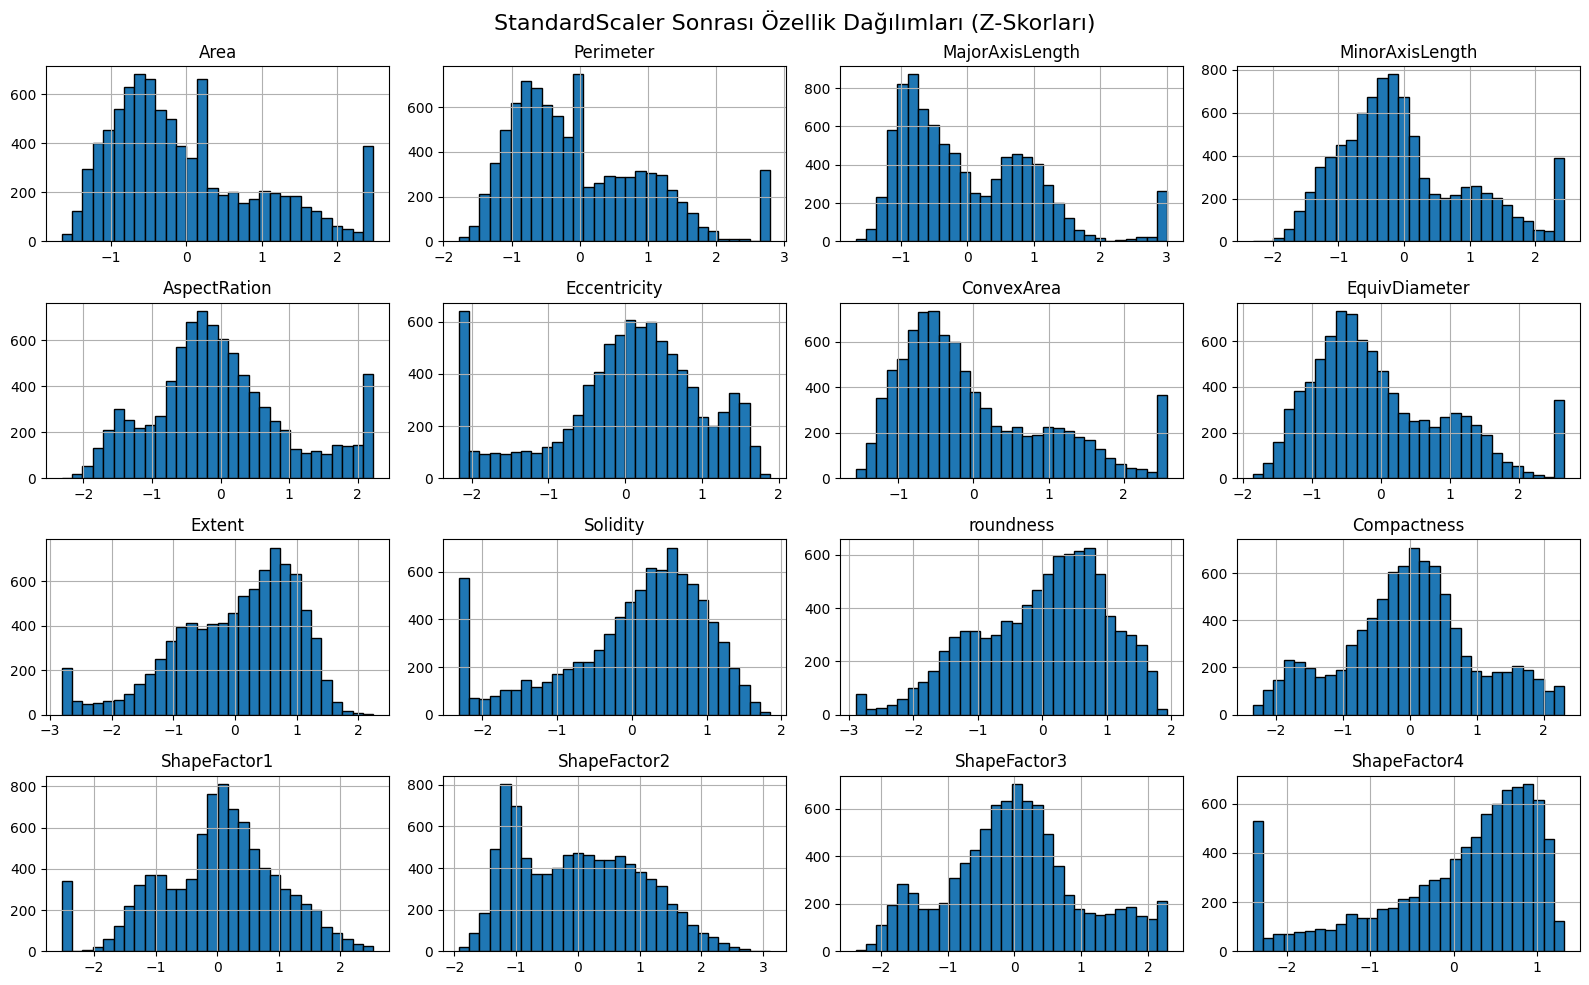

In [58]:
plt.figure(figsize=(16, 10))
scaled_df.drop("Class", axis=1).hist(bins=30, layout=(4, 4), figsize=(16, 10), edgecolor='black')
plt.suptitle("StandardScaler Sonrası Özellik Dağılımları (Z-Skorları)", fontsize=16)
plt.tight_layout()
plt.show()

## Kategorik Sınıf Etiketlerinin Sayısal Formata Dönüştürülmesi

Veri setinde yer alan `Class` sütunu, her gözlemi ait olduğu fasulye türüne göre kategorik olarak sınıflandırmaktadır. Ancak makine öğrenmesi algoritmaları yalnızca sayısal girdilerle çalışabildiğinden, bu kategorik sınıf etiketlerinin uygun şekilde dönüştürülmesi gerekmektedir.

Bu aşamada, `Class` sütunundaki her benzersiz kategori değeri, **LabelEncoder** kullanılarak benzersiz bir tam sayı ile eşleştirilmiştir.


In [77]:
# Label encoder nesnesi oluştur
le = LabelEncoder()

# Kategorik Class sütununu sayısala dönüştür
scaled_df["Class_encoded"] = le.fit_transform(scaled_df["Class"])

# Gerekirse orijinali kaldır
scaled_df = scaled_df.drop("Class", axis=1)

# Kodlama eşlemesi (opsiyonel, rapor için)
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_map)

Label Mapping: {'BARBUNYA': np.int64(0), 'BOMBAY': np.int64(1), 'CALI': np.int64(2), 'DERMASON': np.int64(3), 'HOROZ': np.int64(4), 'SEKER': np.int64(5), 'SIRA': np.int64(6)}


## Özellik Seçimi ve Boyut İndirgeme

1. Ham (Preprocessed) Veri
Değişken Adı: processed_df

İçerik: Eksik değer doldurulmuş, aykırı değerler clip ile sınırlandırılmış, StandardScaler ile ölçeklenmiş, LabelEncoder uygulanmış hâlidir.

Amaç: Modellemeye temel oluşturacak tam ve temizlenmiş veri kümesi.

2. PCA ile İndirgenmiş Veri
Değişken Adı: pca_df

İçerik: scaled_features_df'ten PCA uygulanarak elde edilmiştir. Sadece sayısal sütunlara PCA uygulanmıştır, ilk 2 bileşen (PC1, PC2) görselleştirme için kullanılmıştır.

Amaç: Varyansı koruyarak boyut indirgeme ve sınıflar arası ayrımın görsel analizi.

3. LDA ile İndirgenmiş Veri
Değişken Adı: lda_df

İçerik: processed_df’ten Class_encoded hedef değişkeniyle birlikte LinearDiscriminantAnalysis uygulanarak elde edilmiştir. İlk 2 bileşen (LD1, LD2) görselleştirme içindir.

Amaç: Sınıflar arasındaki farkı maksimize eden doğrusal bileşenlerle temsil edilen veri kümesi.

### Ham Veri Üzerinde Ön İşleme Verisi

In [78]:
# Tüm preprocessing sonrası
processed_df = scaled_df.copy()

In [79]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8847 non-null   float64
 1   Perimeter        8847 non-null   float64
 2   MajorAxisLength  8847 non-null   float64
 3   MinorAxisLength  8847 non-null   float64
 4   AspectRation     8847 non-null   float64
 5   Eccentricity     8847 non-null   float64
 6   ConvexArea       8847 non-null   float64
 7   EquivDiameter    8847 non-null   float64
 8   Extent           8847 non-null   float64
 9   Solidity         8847 non-null   float64
 10  roundness        8847 non-null   float64
 11  Compactness      8847 non-null   float64
 12  ShapeFactor1     8847 non-null   float64
 13  ShapeFactor2     8847 non-null   float64
 14  ShapeFactor3     8847 non-null   float64
 15  ShapeFactor4     8847 non-null   float64
 16  Class_encoded    8847 non-null   int64  
dtypes: float64(16)

In [80]:
scaled_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8847 non-null   float64
 1   Perimeter        8847 non-null   float64
 2   MajorAxisLength  8847 non-null   float64
 3   MinorAxisLength  8847 non-null   float64
 4   AspectRation     8847 non-null   float64
 5   Eccentricity     8847 non-null   float64
 6   ConvexArea       8847 non-null   float64
 7   EquivDiameter    8847 non-null   float64
 8   Extent           8847 non-null   float64
 9   Solidity         8847 non-null   float64
 10  roundness        8847 non-null   float64
 11  Compactness      8847 non-null   float64
 12  ShapeFactor1     8847 non-null   float64
 13  ShapeFactor2     8847 non-null   float64
 14  ShapeFactor3     8847 non-null   float64
 15  ShapeFactor4     8847 non-null   float64
 16  Class            8847 non-null   object 
dtypes: float64(16)

In [82]:
# Sayısal özellikleri al (Class hariç)
X = scaled_features_df.drop("Class", axis=1)
y = scaled_features_df["Class"]

# PCA modelini oluştur ve uygula
pca = PCA()
X_pca = pca.fit_transform(X)

# Açıklanan varyans oranlarını göster
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

In [70]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8847 non-null   float64
 1   Perimeter        8847 non-null   float64
 2   MajorAxisLength  8847 non-null   float64
 3   MinorAxisLength  8847 non-null   float64
 4   AspectRation     8847 non-null   float64
 5   Eccentricity     8847 non-null   float64
 6   ConvexArea       8847 non-null   float64
 7   EquivDiameter    8847 non-null   float64
 8   Extent           8847 non-null   float64
 9   Solidity         8847 non-null   float64
 10  roundness        8847 non-null   float64
 11  Compactness      8847 non-null   float64
 12  ShapeFactor1     8847 non-null   float64
 13  ShapeFactor2     8847 non-null   float64
 14  ShapeFactor3     8847 non-null   float64
 15  ShapeFactor4     8847 non-null   float64
 16  Class_encoded    8847 non-null   int64  
dtypes: float64(16)

### PCA ile Boyut İndirgeme Uygulaması

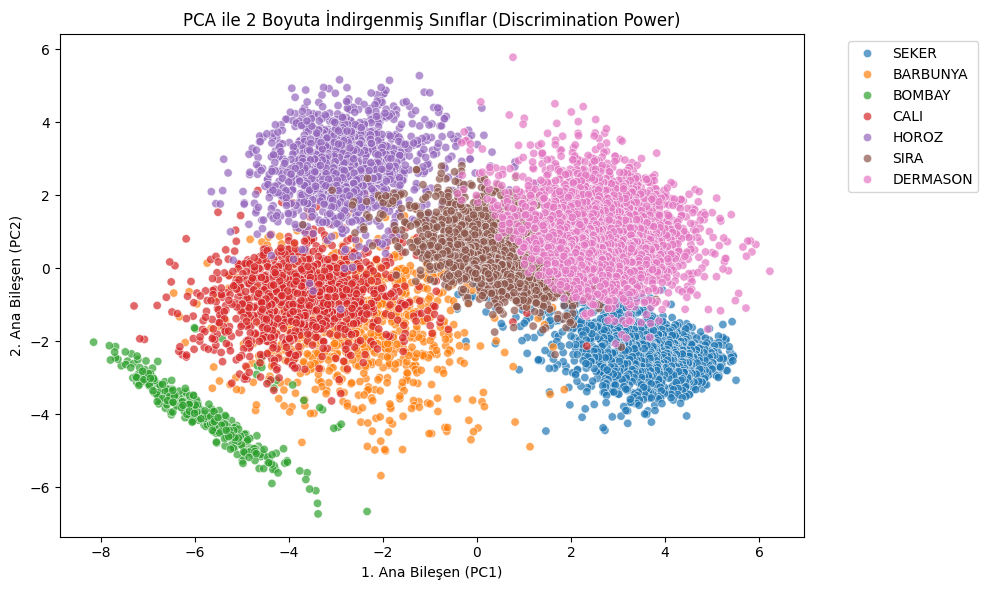

In [84]:
# PCA sonuçlarını DataFrame olarak oluştur
pca_df = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
pca_df["Class"] = y.values  # y zaten scaled_features_df["Class"]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Class", palette="tab10", alpha=0.7)
plt.title("PCA ile 2 Boyuta İndirgenmiş Sınıflar (Discrimination Power)")
plt.xlabel("1. Ana Bileşen (PC1)")
plt.ylabel("2. Ana Bileşen (PC2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Yukarıdaki grafik, PCA (Principal Component Analysis) yöntemi ile 16 boyutlu sayısal özelliklerin yalnızca iki ana bileşene indirgenerek görselleştirilmesini göstermektedir. "PC1" ve "PC2" adlı bu bileşenler, veri setindeki toplam varyansın büyük bir kısmını temsil eder.

Sınıflar belirgin şekilde gruplanmıştır, bu da PCA’nın sınıflar arasındaki ayrımı güçlü biçimde koruduğunu gösterir.

Örneğin Bombay sınıfı (yeşil), diğerlerinden oldukça farklı bir konumda kümelenmiştir. Bu durum, Bombay fasulyelerinin morfolojik olarak belirgin farklılıklara sahip olduğunu göstermektedir.

Diğer sınıflar arasında bazı örtüşmeler (örneğin Seker ve Dermason gibi) olsa da, genel olarak sınıf ayrımı anlamlıdır.

Bu dağılım, PCA’nın veri boyutunu azaltırken bilgiyi koruma kapasitesinin yüksek olduğunu ve modelleme için iyi bir öznitelik çıkarması sağladığını gösterir.

## LDA ile Etiket Bilgisine Dayalı Boyut İndirgeme

In [88]:
# Özellikler ve etiketler
X = processed_df.drop("Class_encoded", axis=1)
y = processed_df["Class_encoded"]

# LDA modeli (3 bileşen)
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X, y)

# Görselleştirme için ilk 2 bileşen
lda_df = pd.DataFrame(X_lda[:, :2], columns=["LD1", "LD2"])
lda_df["Class"] = y

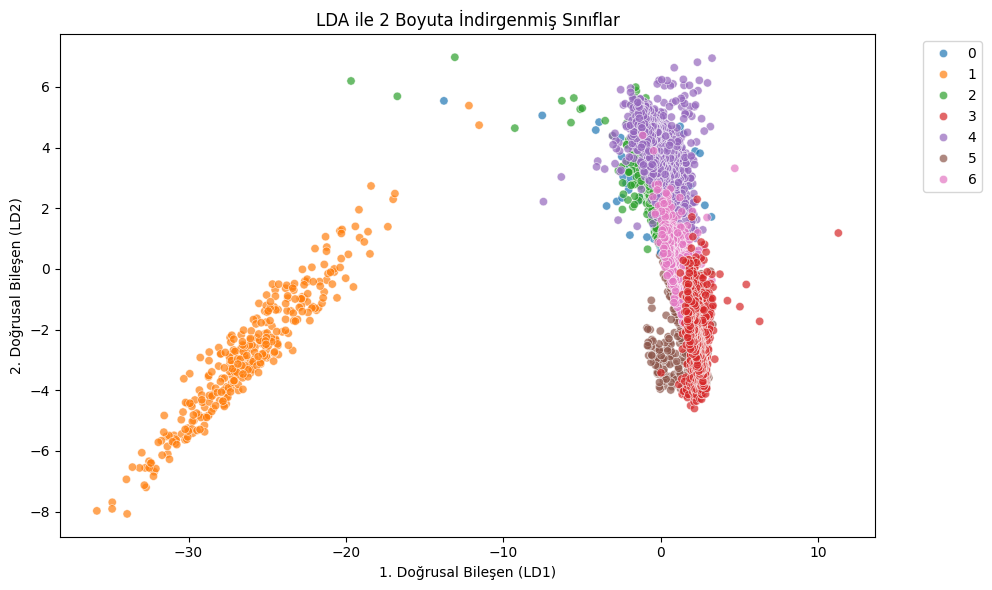

In [89]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lda_df, x="LD1", y="LD2", hue="Class", palette="tab10", alpha=0.7)
plt.title("LDA ile 2 Boyuta İndirgenmiş Sınıflar")
plt.xlabel("1. Doğrusal Bileşen (LD1)")
plt.ylabel("2. Doğrusal Bileşen (LD2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

LDA Sonrası Sınıf Ayrımı Analizi (Discriminative Power)
LD1 (1. Doğrusal Bileşen) ekseni sınıflar arasında en yüksek ayrımı sağlıyor. Özellikle sınıf 1 (turuncu) diğerlerinden oldukça farklı bir bölgede kümelenmiş. Bu, LD1 bileşeninin bu sınıfı ayırmada çok etkili olduğunu gösteriyor.

Diğer sınıflar (0, 2, 3, 4, 5, 6) LD1 ve LD2 üzerinde birbirinden temizce ayrılmış, küçük bölgelerde kümelenmiş görünüyor.

Bazı sınıflar arasında (örneğin 5 ve 6) ufak örtüşmeler var; ancak genel olarak LDA dönüşümü çok başarılı olmuş, sınıflar neredeyse lineer ayrılabilir hale gelmiş.

## Nested Cross-Validation Yapısı

In [90]:
# Model örneği (diğer modeller için değiştirilebilir)
model = RandomForestClassifier(random_state=42)

# Hiperparametre aralığı (inner loop için)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

# İç döngü: Hiperparametre ayarı (sabit veri bölünmesi)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# GridSearchCV modeli: İç döngüde hiperparametre seçimi yapılır
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv)

# Dış döngü: Model performansı değerlendirme (rastgele veri bölünmesi her adımda)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Nested cross-validation uygulanır
nested_scores = cross_val_score(grid_search, X, y, cv=outer_cv)

# Sonuçları göster
print("Nested CV Ortalama Başarı:", nested_scores.mean())
print("Nested CV Standart Sapma:", nested_scores.std())

Nested CV Ortalama Başarı: 0.9202008859421358
Nested CV Standart Sapma: 0.0074452504621552295


Nested Cross-Validation yapısında, dış döngü (5-fold) modelin genel performansını değerlendirmek için kullanılmış, iç döngü (3-fold) ise hiperparametre ayarlaması amacıyla sabit veri bölünmesiyle yapılandırılmıştır. Bu sayede model, her dış döngü adımında farklı test kümeleri üzerinde denenmiş ve iç döngüdeki ayar sabit kalarak tutarlı sonuçlar elde edilmiştir.


### Nested Cross-Validation: Ham Veri Üzerinde Model Karşılaştırması (processed_df)

In [97]:
# Veri
X_raw = processed_df.drop("Class_encoded", axis=1)
y_raw = processed_df["Class_encoded"]

# Modeller
models_raw = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "NaiveBayes": GaussianNB()
}

# Hiperparametreler
param_grids_raw = {
    "LogisticRegression": {"C": [0.1, 1, 10]},
    "DecisionTree": {"max_depth": [None, 10, 20]},
    "RandomForest": {"n_estimators": [50, 100], "max_depth": [None, 10]},
    "XGBoost": {"n_estimators": [50, 100], "max_depth": [3, 5]},
    "NaiveBayes": {}
}

# Skorlar
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# CV Yapısı
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Sonuçları topla
results_raw = {}

for name, model in models_raw.items():
    grid = GridSearchCV(estimator=model, param_grid=param_grids_raw[name], cv=inner_cv, scoring=scoring, refit='accuracy')
    scores = cross_validate(grid, X_raw, y_raw, cv=outer_cv, scoring=scoring, return_train_score=False)

    results_raw[name] = {
        "accuracy_mean": scores['test_accuracy'].mean(),
        "accuracy_std": scores['test_accuracy'].std(),
        "precision_mean": scores['test_precision_macro'].mean(),
        "recall_mean": scores['test_recall_macro'].mean(),
        "f1_mean": scores['test_f1_macro'].mean()
    }

results_raw

{'LogisticRegression': {'accuracy_mean': np.float64(0.924381868526698),
  'accuracy_std': np.float64(0.003956096326690523),
  'precision_mean': np.float64(0.9369496656790812),
  'recall_mean': np.float64(0.9351156752979707),
  'f1_mean': np.float64(0.9359170825939129)},
 'DecisionTree': {'accuracy_mean': np.float64(0.8978207228700181),
  'accuracy_std': np.float64(0.008650522576585716),
  'precision_mean': np.float64(0.9127608505001247),
  'recall_mean': np.float64(0.910169030375098),
  'f1_mean': np.float64(0.9111395412691682)},
 'RandomForest': {'accuracy_mean': np.float64(0.9205395496194665),
  'accuracy_std': np.float64(0.006731662907146353),
  'precision_mean': np.float64(0.9334414659254904),
  'recall_mean': np.float64(0.9307992892408883),
  'f1_mean': np.float64(0.9319831459856106)},
 'XGBoost': {'accuracy_mean': np.float64(0.9216687905005541),
  'accuracy_std': np.float64(0.0019597970185225065),
  'precision_mean': np.float64(0.9343824267690419),
  'recall_mean': np.float64(0.9

### Nested Cross-Validation: PCA Dönüştürülmüş Veri Üzerinde Model Karşılaştırması (pca_df)

In [98]:
# PCA'dan gelen veri (ilk iki bileşen kullanılıyor)
X_pca = pca_df[["PC1", "PC2"]]
y_pca = processed_df["Class_encoded"]

# Modeller (pca için aynıdır)
models_pca = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "NaiveBayes": GaussianNB()
}

# Hiperparametreler (pca için aynıdır)
param_grids_pca = {
    "LogisticRegression": {"C": [0.1, 1, 10]},
    "DecisionTree": {"max_depth": [None, 10, 20]},
    "RandomForest": {"n_estimators": [50, 100], "max_depth": [None, 10]},
    "XGBoost": {"n_estimators": [50, 100], "max_depth": [3, 5]},
    "NaiveBayes": {}
}

# Skorlayıcılar ve CV yapıları öncekiyle aynı kullanılır

# Sonuçları kaydet
results_pca = {}

for name, model in models_pca.items():
    grid = GridSearchCV(estimator=model, param_grid=param_grids_pca[name], cv=inner_cv, scoring=scoring, refit='accuracy')
    scores = cross_validate(grid, X_pca, y_pca, cv=outer_cv, scoring=scoring, return_train_score=False)

    results_pca[name] = {
        "accuracy_mean": scores['test_accuracy'].mean(),
        "accuracy_std": scores['test_accuracy'].std(),
        "precision_mean": scores['test_precision_macro'].mean(),
        "recall_mean": scores['test_recall_macro'].mean(),
        "f1_mean": scores['test_f1_macro'].mean()
    }
results_pca

{'LogisticRegression': {'accuracy_mean': np.float64(0.8699005151494827),
  'accuracy_std': np.float64(0.008719019660952607),
  'precision_mean': np.float64(0.8647695936343014),
  'recall_mean': np.float64(0.859543924566298),
  'f1_mean': np.float64(0.860811928382932)},
 'DecisionTree': {'accuracy_mean': np.float64(0.8458249897002041),
  'accuracy_std': np.float64(0.006489547783806558),
  'precision_mean': np.float64(0.8451380553921961),
  'recall_mean': np.float64(0.8398931260238678),
  'f1_mean': np.float64(0.841573570077496)},
 'RandomForest': {'accuracy_mean': np.float64(0.8667362262186495),
  'accuracy_std': np.float64(0.0089700574122842),
  'precision_mean': np.float64(0.8652365463339036),
  'recall_mean': np.float64(0.8567974674897888),
  'f1_mean': np.float64(0.8596154238984415)},
 'XGBoost': {'accuracy_mean': np.float64(0.864701050419497),
  'accuracy_std': np.float64(0.01016293955882966),
  'precision_mean': np.float64(0.8585655222878985),
  'recall_mean': np.float64(0.8538270

### Nested Cross-Validation: LDA Dönüştürülmüş Veri Üzerinde Model Karşılaştırması (lda_df)

In [99]:
# Veri: LDA bileşenleri ve sınıf etiketleri
X_lda = lda_df[["LD1", "LD2"]]
y_lda = lda_df["Class"]

# Modeller
models_lda = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "NaiveBayes": GaussianNB()
}

# Hiperparametreler
param_grids_lda = {
    "LogisticRegression": {"C": [0.1, 1, 10]},
    "DecisionTree": {"max_depth": [None, 10, 20]},
    "RandomForest": {"n_estimators": [50, 100], "max_depth": [None, 10]},
    "XGBoost": {"n_estimators": [50, 100], "max_depth": [3, 5]},
    "NaiveBayes": {}
}

# Skorlayıcılar ve CV yapıları öncekiyle aynı kullanılır

# Sonuçları sakla
results_lda = {}

for name, model in models_lda.items():
    grid = GridSearchCV(estimator=model, param_grid=param_grids_lda[name], cv=inner_cv, scoring=scoring, refit='accuracy')
    scores = cross_validate(grid, X_lda, y_lda, cv=outer_cv, scoring=scoring, return_train_score=False)

    results_lda[name] = {
        "accuracy_mean": scores['test_accuracy'].mean(),
        "accuracy_std": scores['test_accuracy'].std(),
        "precision_mean": scores['test_precision_macro'].mean(),
        "recall_mean": scores['test_recall_macro'].mean(),
        "f1_mean": scores['test_f1_macro'].mean()
    }
results_lda

{'LogisticRegression': {'accuracy_mean': np.float64(0.7454515143095304),
  'accuracy_std': np.float64(0.009937768274254726),
  'precision_mean': np.float64(0.7576850493532732),
  'recall_mean': np.float64(0.7442183376019432),
  'f1_mean': np.float64(0.7479687914019962)},
 'DecisionTree': {'accuracy_mean': np.float64(0.7546066116705471),
  'accuracy_std': np.float64(0.009049095880823626),
  'precision_mean': np.float64(0.7638708576787232),
  'recall_mean': np.float64(0.7564038008960887),
  'f1_mean': np.float64(0.7590456473964572)},
 'RandomForest': {'accuracy_mean': np.float64(0.774387968560871),
  'accuracy_std': np.float64(0.008850601277699773),
  'precision_mean': np.float64(0.7831350702878269),
  'recall_mean': np.float64(0.7741389036464202),
  'f1_mean': np.float64(0.777269316879439)},
 'XGBoost': {'accuracy_mean': np.float64(0.7731449029583569),
  'accuracy_std': np.float64(0.008114291837346691),
  'precision_mean': np.float64(0.7835965245308478),
  'recall_mean': np.float64(0.77

### 🧪 Nested Cross-Validation Sonuçları – 3 Veri Temsili Karşılaştırması

| Model             | Veri Kümesi     | Accuracy | Precision | Recall  | F1 Score |
|------------------|------------------|----------|-----------|---------|----------|
| LogisticRegression | Ham (`processed_df`) | **0.9244** | **0.9370** | **0.9351** | **0.9359** |
| LogisticRegression | PCA (`pca_df`)       | 0.8699     | 0.8648    | 0.8595  | 0.8608   |
| LogisticRegression | LDA (`lda_df`)       | 0.7455     | 0.7577    | 0.7442  | 0.7480   |
| DecisionTree       | Ham                 | **0.8978** | **0.9128** | **0.9102** | **0.9111** |
| DecisionTree       | PCA                 | 0.8458     | 0.8451    | 0.8399  | 0.8416   |
| DecisionTree       | LDA                 | 0.7546     | 0.7639    | 0.7564  | 0.7590   |
| RandomForest       | Ham                 | **0.9205** | **0.9334** | **0.9308** | **0.9320** |
| RandomForest       | PCA                 | 0.8667     | 0.8652    | 0.8568  | 0.8596   |
| RandomForest       | LDA                 | 0.7744     | 0.7831    | 0.7741  | 0.7773   |
| XGBoost            | Ham                 | **0.9217** | **0.9344** | **0.9327** | **0.9334** |
| XGBoost            | PCA                 | 0.8647     | 0.8586    | 0.8538  | 0.8554   |
| XGBoost            | LDA                 | 0.7731     | 0.7836    | 0.7729  | 0.7768   |
| NaiveBayes         | Ham                 | **0.9008** | **0.9106** | **0.9106** | **0.9100** |
| NaiveBayes         | PCA                 | 0.8609     | 0.8534    | 0.8505  | 0.8480   |
| NaiveBayes         | LDA                 | 0.7207     | 0.7489    | 0.7159  | 0.7139   |

---

### Analiz

- **En yüksek performans** tüm metriklerde ham veri (processed_df) ile elde edilmiştir.
- **PCA**, bilgi kaybı nedeniyle tüm modellerde düşük sonuçlar üretmiş ancak hâlâ kabul edilebilir düzeydedir.
- **LDA**, sınıf ayrımını vurgulasa da sınıflandırma performansı en düşük olan veri temsili olmuştur.
- **Logistic Regression, XGBoost ve Random Forest**, ham veri üzerinde en başarılı üç modeldir.
